# 0. References
1. [Deep Drowsiness Detection using YOLO, Pytorch and Python](https://www.youtube.com/watch?v=tFNJGim3FXw)
2. [YOLO-Drowsiness-Detection](https://github.com/nicknochnack/YOLO-Drowsiness-Detection)
3. [Tutorial: Running YOLOv5 Machine Learning Detection on a Raspberry Pi 4](https://jordan-johnston271.medium.com/tutorial-running-yolov5-machine-learning-detection-on-a-raspberry-pi-4-3938add0f719)

## 0.1 Mount Google Drive

In [4]:
import os

try:
    from google.colab import drive
    IN_COLAB = True
    drive.mount('/content/drive')
    root_path = '/content/drive/MyDrive/git/dog-poop-detector-yolov5'
    os.chdir(root_path)

except ImportError:
    IN_COLAB = False
    root_path = os.getcwd()

if IN_COLAB:
    print("Running in Google Colab")
else:
    print("Not running in Google Colab")

print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Running in Google Colab
/content/drive/MyDrive/git/dog-poop-detector-yolov5


# 1. Install dependencies

In [8]:
!pip install pillow==9.5.0

In [9]:
!pip install yolov5

# 2. Check GPU & RAM availability

In [5]:
import torch

if torch.cuda.is_available():
    print("GPU is available!")
    !nvidia-smi
else:
    print("GPU is not available.")

GPU is available!
Sat Mar 16 03:05:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              49W / 400W |      5MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+-------

In [6]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


# 3. Load Model (yolov5s)

In [10]:
import os
import yolov5
import numpy as np
from matplotlib import pyplot as plt

In [11]:
model = yolov5.load('yolov5s.pt')
model.conf = 0.7

## 3.1 Test is YOLO detection working

In [12]:
sources = [
    'https://s.yimg.com/ny/api/res/1.2/.Yfa9cvEYDMFw6FodZch8g--/YXBwaWQ9aGlnaGxhbmRlcjt3PTk2MDtoPTU0MTtjZj13ZWJw/https://media.zenfs.com/en/dog_time_927/d56c8a78d352ed6a1ea2d506e200e130',
    'https://www.halifaxhumanesociety.org/zupload/library/153/-703-700x500-0.jpg',
    'dataset/tests/test1.png',
    'dataset/tests/test2.png'
]

In [13]:
def detect(source):
  results = model(source)
  results.print()

  # display detection result
  %matplotlib inline
  plt.figure(figsize=(10, 10))
  plt.imshow(np.squeeze(results.render()))
  plt.show()

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1: 428x760 3 dogs
Speed: 409.0ms pre-process, 121.5ms inference, 691.8ms NMS per image at shape (1, 3, 384, 640)


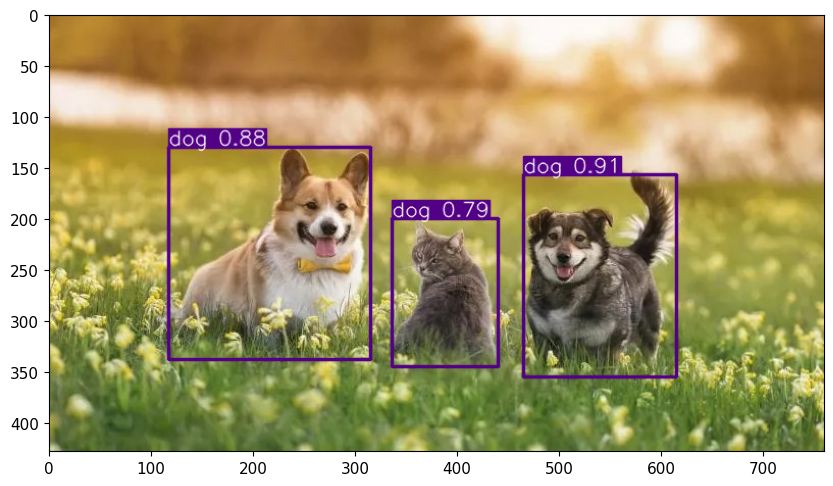

image 1/1: 324x700 1 cat, 4 dogs
Speed: 1209.6ms pre-process, 106.4ms inference, 1.7ms NMS per image at shape (1, 3, 320, 640)


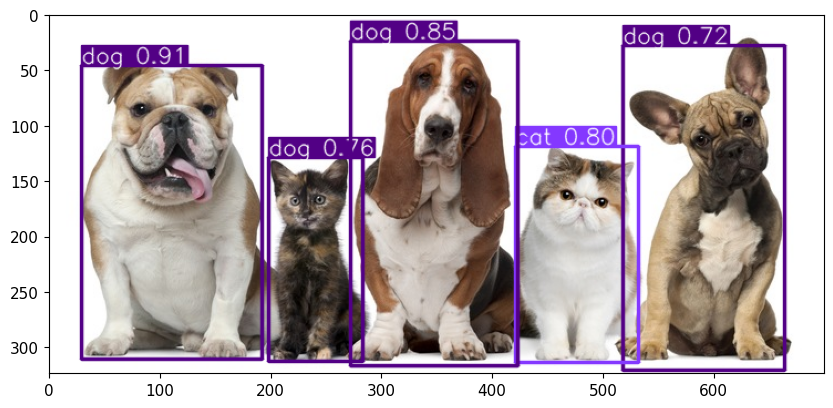

image 1/1: 1296x2304 (no detections)
Speed: 1323.6ms pre-process, 10.8ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


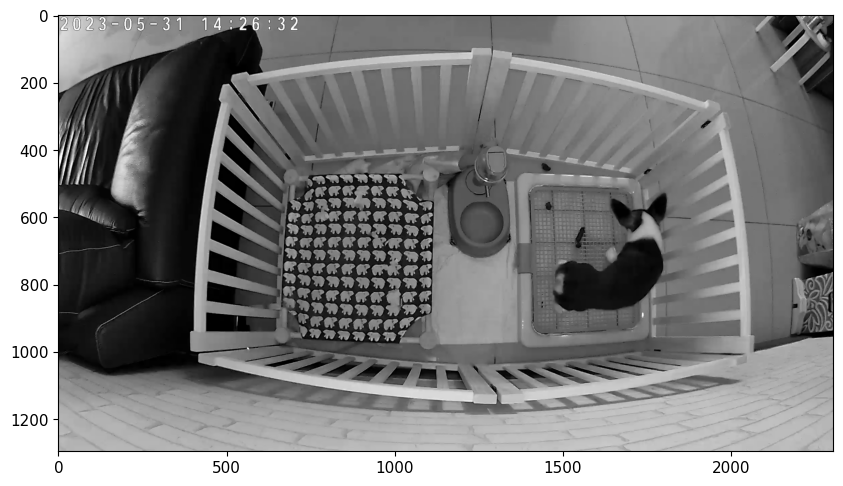

image 1/1: 1296x2304 (no detections)
Speed: 752.2ms pre-process, 10.2ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


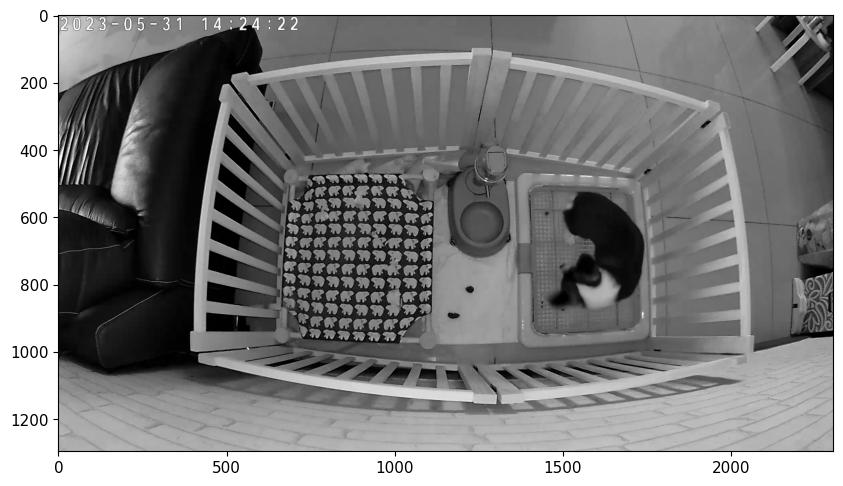

In [14]:
for source in sources:
  detect(source)

# 4. Capture & label image samples for model training

## 4.1 Capture image samples
Prepare image samples, images preferable to be in square dimensions (e.g: 640x640 pixels)

## 4.2 Label you image samples
https://youtu.be/tFNJGim3FXw?t=2810

### Install LabelImg

In [6]:
if not IN_COLAB:
  !pip install labelImg

### Start label images
https://youtu.be/tFNJGim3FXw?t=3142

In [7]:
if not IN_COLAB:
  !labelImg

# 5. Train Model
Refer： https://youtu.be/tFNJGim3FXw?t=3536

## 5.1 Start training

In [20]:
# setup dataset.yaml, https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data#11-create-datasetyaml

# delete label cache
label_cache_path = 'dataset/labels.cache'
if os.path.isfile(label_cache_path):
    os.remove(label_cache_path)

In [21]:
def elapsed_time(elapsed_sec):
  hours = int(elapsed_sec // 3600)
  minutes = int((elapsed_sec % 3600) // 60)
  seconds = int(elapsed_sec % 60)

  # Display the execution time
  print(f"Execution time: {hours}hr {minutes}min {seconds}sec")

In [29]:
gpu_name = torch.cuda.get_device_name()
print(f"Using GPU '{gpu_name}'")

# batch: 16, 20, 32, 40, 64, 80, 96, 128
# worker: 8

if 'A100' in gpu_name:
  batch = 128
  workers = 24
else
  batch = 128
  workers = 12

epochs = 1600
img_size = 640
save_period = -1 # default -1
patience = 200 # default 100, 0 to disable

SyntaxError: expected ':' (<ipython-input-29-82f4cba78473>, line 10)

In [23]:
import time
from datetime import datetime
import pytz

def get_datetime(timezone='Etc/GMT-8'):
    tz = pytz.timezone(timezone)
    return datetime.now(tz)

# measure execution time
start_time = time.time()
print(f"Start training at {get_datetime()}")

Start training at 2024-03-16 11:10:25.171686+08:00


In [24]:
from yolov5 import train

train.run(imgsz=img_size, batch=batch, epochs=epochs, data='dataset.yaml', weights='yolov5s.pt', save_period=save_period, patience=patience, workers=workers)

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=../../../../../usr/local/lib/python3.10/dist-packages/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=1600, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=16, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=200, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, bbox_interval=-1, artifact_alias=latest, neptune_token=None, neptune_project=None, neptune_resume_id=None, s3_upload_dir=None, upload_dataset=False, hf_model_id=None, hf_token=None, hf_private=False, hf_dataset_id=None, roboflow_token=None, roboflow_upload=False, batch=128
YOLOv5 🚀 2024-3-16 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

hyperparameters: lr0=0.01, lrf=0.01, momen

requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.


Streaming output truncated to the last 5000 lines.

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   603/1599       4.1G    0.01788   0.007324  0.0005954         45        640: 100%|██████████| 6/6 [00:00<00:00,  9.93it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]
                   all         95        199      0.999      0.999      0.995      0.908

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   604/1599       4.1G    0.01809   0.007224  0.0005648         49        640: 100%|██████████| 6/6 [00:00<00:00, 10.43it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]
                   all         95        199      0.998          1      0.995      0.906

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   605/1599 

Namespace(weights='yolov5s.pt', cfg='', data='dataset.yaml', hyp={'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}, epochs=1600, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket='', cache=None, image_weights=False, device='', multi_scale=False, single_cls=False, optimizer='SGD', sync_bn=False, workers=16, project='runs/train', name='exp', exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=200, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, bbox_interval=-1, artifac

In [25]:
elapsed_time(time.time() - start_time)

Execution time: 1hr 2min 3sec


## 5.2 Show Training Results

In [26]:
def find_latest_exp(path):
  exp_folders = [folder for folder in os.listdir(path) if folder.startswith('exp')]

  if exp_folders:
      latest_exp = max(exp_folders, key=lambda x: 0 if x=='exp' else int(x[3:]))
      print("Latest experiment number:", latest_exp)
  else:
      print("No 'exp' folders found.")
      latest_exp = 'exp'

  return latest_exp

In [27]:
train_path = 'runs/train'
latest_exp = find_latest_exp(train_path)

Latest experiment number: exp3


In [28]:
from PIL import Image

# Load the image
image_path = f'{train_path}/{latest_exp}/results.png'
image = Image.open(image_path)

# Display the image
image.show()

# 6. Evaluate Model

In [30]:
model_path = f'{train_path}/{latest_exp}/weights/best.pt'
print(model_path)

runs/train/exp3/weights/best.pt


In [31]:
model = yolov5.load(model_path)
model.conf = 0.7

print(model.names)

{0: 'dog', 1: 'poop', 2: 'cotton'}


## 6.1 Evaluate on images

In [32]:
evals = [
    {"source": "dataset/tests/test1.png", "results": {"dog": 1, "poop": 3}},
    {"source": "dataset/tests/test2.png", "results": {"dog": 1, "poop": 2}},
    {"source": "dataset/tests/test3.png", "results": {"dog": 1, "poop": 2}},
    {"source": "dataset/tests/test4.png", "results": {"dog": 1, "poop": 5}},
    {"source": "dataset/tests/test5.png", "results": {"dog": 1, "poop": 5}},
    {"source": "dataset/tests/test6.png", "results": {"dog": 1}},
    {"source": "dataset/tests/test7.jpg", "results": {"dog": 1}},
    {"source": "dataset/tests/test8.png", "results": {"dog": 1, "poop": 7}},
    {"source": "dataset/tests/test9.jpg", "results": {"poop": 1}},
    {"source": "dataset/tests/test10.jpg", "results": {"poop": 3}},
    {"source": "dataset/tests/test11.jpg", "results": {"poop": 3}},
    {"source": "dataset/tests/test12.jpg", "results": {"dog": 1}},
    {"source": "dataset/tests/test13.jpg", "results": {"dog": 1}},
    {"source": "dataset/tests/test14.jpg", "results": {"dog": 1}},
    {"source": "dataset/tests/test15.jpg", "results": {"dog": 1}},
    {"source": "dataset/tests/test16.jpg", "results": {"dog": 0, "poop": 2}},
    {"source": "dataset/tests/test-cotton-dog-1.jpg", "results": {"dog": 1, "cotton": 1}},
]

In [33]:
from collections import Counter

def evaluate(source, expected_results):
    results = model(source)

    # Get the class labels
    class_labels = model.names

    # Initialize dictionaries to store class counts and total confidence
    class_counts = Counter()
    class_total_confidence = Counter()

    # Iterate over the detected objects
    for obj in results.pred[0]:
        class_id = int(obj[5])
        class_label = class_labels[class_id]
        confidence = obj[4]

        # Update class counts and total confidence
        class_counts[class_label] += 1
        class_total_confidence[class_label] += confidence

    for class_label, expected_count in expected_results.items():
        detected_count = class_counts[class_label]
        total_confidence = class_total_confidence[class_label]

        # Calculate mean confidence
        mean_confidence = total_confidence / detected_count if detected_count > 0 else 0.0
        mean_confidence = 0 if isinstance(mean_confidence, float) else round(mean_confidence.item(), 3)

        passed = detected_count == expected_count
        print(f"{'✅' if passed else '❌'} Class: {class_label}, Count: {detected_count}, Expected: {expected_count}, Mean Confidence: {mean_confidence}")

    results.print()

    # display detection result
    %matplotlib inline
    plt.figure(figsize=(10, 10))
    plt.imshow(np.squeeze(results.render()))
    plt.show()

In [ ]:
for eval in evals:
  source = eval['source']
  expected_results = eval['results']
  print(f"Evaluating model with '{source}'")
  evaluate(source, expected_results)

## 6.2 Test on video

In [ ]:
source = 'dataset/to-eval'

In [ ]:
from yolov5 import detect

nosave = False
view_img = False
detect.run(weights=model_path, source=source, line_thickness=2, conf_thres=0.7, view_img=view_img, nosave=nosave)